機械学習（ニューラルネットワーク）によりアヤメの花の分類を行うプログラム

このプログラムでは，特徴量（がく片の長さ，花びらの長さと幅）で3クラス（セトサ，ヴァーシカラー，ヴァージニカ）へ分類を行います

In [ ]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

Now Learning...
Iteration 1, loss = 1.92482800
Iteration 2, loss = 1.92033137
Iteration 3, loss = 1.91582272
Iteration 4, loss = 1.91129528
Iteration 5, loss = 1.90676398
Iteration 6, loss = 1.90222945
Iteration 7, loss = 1.89771055
Iteration 8, loss = 1.89319534
Iteration 9, loss = 1.88869177
Iteration 10, loss = 1.88419407
Iteration 11, loss = 1.87971276
Iteration 12, loss = 1.87524048
Iteration 13, loss = 1.87077003
Iteration 14, loss = 1.86630178
Iteration 15, loss = 1.86182990
Iteration 16, loss = 1.85736670
Iteration 17, loss = 1.85291543
Iteration 18, loss = 1.84845661
Iteration 19, loss = 1.84399645
Iteration 20, loss = 1.83954437
Iteration 21, loss = 1.83510536
Iteration 22, loss = 1.83067148
Iteration 23, loss = 1.82624205
Iteration 24, loss = 1.82182581
Iteration 25, loss = 1.81742496
Iteration 26, loss = 1.81304006
Iteration 27, loss = 1.80867155
Iteration 28, loss = 1.80431984
Iteration 29, loss = 1.79997877
Iteration 30, loss = 1.79565081
Iteration 31, loss = 1.79133985
I

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


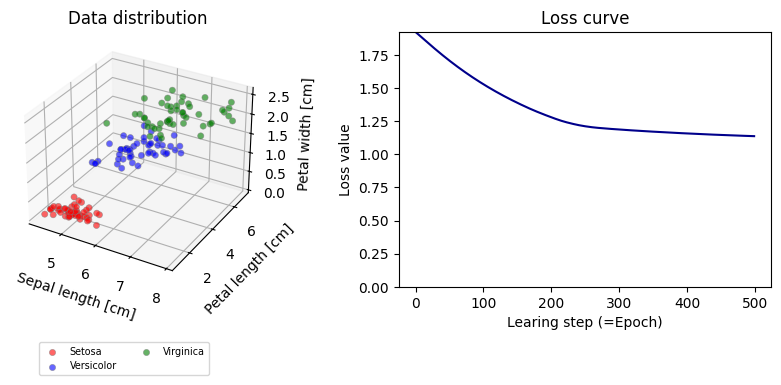

In [ ]:
#　アヤメの分類 3特徴量(2petal+1sepal)で3クラスへ分類

# 学習回数
epochs = 100
# データ分割（学習用，テスト用）
data_split = False


# アヤメのデータを読み込み、変数irisに格納
iris = datasets.load_iris()
# 特徴量のセットを変数Xに、ターゲットを変数yに格納
X = iris.data
y = iris.target

# 特徴量を
# 3個だけ抽出（1列目~3列目のみ残す）
#X = X[:,1:4]
# 3個だけ抽出（0,2~3列目のみ残す）
X = X[:,[0,2,3]]

# data split (train, test)
if data_split == True:
	# stratifyは各クラスの割合を学習，テストデータでそろえるためのパラメータ
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
else:
	X_train = X
	y_train = y



# 分類器：多層ニューラルネットワーク
# hidden_layer_sizes : 中間層数、各中間層ニューロン数
# max_iter : 学習回数上限
# tol : 損失関数の値の変化が10回tol値以下で学習終了
# random_state : 重みの初期値 (1＝ランダム初期値固定、None = ランダム初期値変化）
clf = MLPClassifier(hidden_layer_sizes=(4, ), max_iter=epochs, tol=0, random_state=1, verbose=1)


# ニューラルネットワークの学習
print('Now Learning...')
clf.fit(X_train, y_train)

# 分類精度を計算
# 学習データに対する分類結果を取得
result = clf.predict(X_train)

print('ターゲット（正解）')
print(y_train)
print('ニューラルネットワークの判定')
print(result)

# データ数をtotalに格納
# len : 配列の長さ取得（2次元配列に対しては行数取得）
total = len(X_train)
# ターゲット（正解）と予測が一致した数をcorrect_numに格納
correct_num = sum(result==y_train)

# 正解率をパーセント表示
print('')
print('Data num of train: {}'.format(total))
print('Accuracy [%] for train data: {:.2f}\n'.format(100.0*correct_num/total))

if data_split == True:
	result_test = clf.predict(X_test)
	total_test = len(X_test)
	correct_num = sum(result_test==y_test)
	print('Data num of test: {}'.format(total_test))
	print('Accuracy [%] for test data: {:.2f}'.format(100.0*correct_num/total_test))



# データの分布を表示
# グラフウインドウ全体の大きさ(縦方向に1枚、横方向に2枚のグラフ表示領域を確保)
fig = plt.figure(figsize=(8.5,4.0))
axs = fig.add_subplot(1,2,1, projection='3d')
# Graph title
axs.set_title('Data distribution')
# 軸ラベルを設定
axs.set_xlabel('Sepal length [cm]')
axs.set_ylabel('Petal length [cm]')
axs.set_zlabel('Petal width [cm]')


# ターゲットを表示(クラスで色分け）
# iris setosa (y=0) のデータのみを取り出す
Xc0 = X[y==0]
# iris versicolor (y=1) のデータのみを取り出す
Xc1 = X[y==1]
# iris virginica (y=2) のデータのみを取り出す
Xc2 = X[y==2]

# iris setosa のデータXc0をプロット
axs.scatter(Xc0[:,0], Xc0[:,1], Xc0[:,2], c='red', linewidths=0.5, edgecolors='gray', alpha=0.6, label='Setosa')
# iris versicolor のデータXc1をプロット
axs.scatter(Xc1[:,0], Xc1[:,1], Xc1[:,2], c='blue', linewidths=0.5, edgecolors='gray', alpha=0.6, label='Versicolor')
# iris virginica のデータXc2をプロット
axs.scatter(Xc2[:,0], Xc2[:,1], Xc2[:,2], c='green', linewidths=0.5, edgecolors='gray', alpha=0.6, label='Virginica')
# legend
axs.legend(bbox_to_anchor=(0.8,-0.2), ncol=2, fontsize='x-small')


# 2枚目のグラフを設定
# 損失関数の時間変化を描画
axs = fig.add_subplot(1,2,2)
axs.plot(clf.loss_curve_, color='darkblue')
# 損失関数のグラフのtitle, 軸ラベルを設定
axs.set_title('Loss curve')
axs.set_xlabel('Learing step (=Epoch)')
axs.set_ylabel('Loss value')
# グラフ縦軸の範囲　最小値0、最大値をloss_curve_の最大値とする
axs.set_ylim(0, max(clf.loss_curve_))

# グラフを表示
plt.tight_layout()
plt.show()